# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
import os
import sys
import warnings

# Data Retrieval  

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
target = pd.read_csv("sample_submission.csv")

In [ ]:
Data Wrangling

In [4]:
test=target.merge(test,on='id')

In [5]:
total_data = pd.concat([train,test])

In [9]:
total_data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56,0
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165,0
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74,0
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265,0


In [6]:
total_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
print(total_data.shape)

(508146, 12)


In [8]:
target.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [24]:
target.tail()

,id,Response
127032,508142,0
127033,508143,0
127034,508144,0
127035,508145,0
127036,508146,0


In [25]:
train_shape = train.shape
print("The data has Rows {}, Columns {}".format(*train_shape))

The data has Rows 381109, Columns 12


In [26]:
test_shape = test.shape
print("The data has Rows {}, Columns {}".format(*test_shape))

The data has Rows 127037, Columns 12


In [27]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [28]:
test.head()

,id,Response,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,0,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,0,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,0,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,0,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,0,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [29]:
print("Train data")
print(train.info())
print(train.isnull().sum())
print("------------x----------------x--------------x-----------------")
print("Test data")
print(test.info())
print(test.isnull().sum())

Train data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None
id                      0
Gender                  0
Age                     0
Driv

In [30]:
train.isnull()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,False,False,False,False,False,False,False,False,False,False,False,False
381105,False,False,False,False,False,False,False,False,False,False,False,False
381106,False,False,False,False,False,False,False,False,False,False,False,False
381107,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
train.isnull().values.any()

False

In [32]:
train.Vehicle_Age.unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

# MODELING

In [33]:
total_data1 = total_data.copy()
cols = ['Driving_License','Previously_Insured', 'Response']
for col in cols:
    total_data1[col] = total_data1[col].map({0:'No',1:'Yes'})

In [34]:
total_data1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,Yes,28.0,No,> 2 Years,Yes,40454.0,26.0,217,Yes
1,2,Male,76,Yes,3.0,No,1-2 Year,No,33536.0,26.0,183,No
2,3,Male,47,Yes,28.0,No,> 2 Years,Yes,38294.0,26.0,27,Yes
3,4,Male,21,Yes,11.0,Yes,< 1 Year,No,28619.0,152.0,203,No
4,5,Female,29,Yes,41.0,Yes,< 1 Year,No,27496.0,152.0,39,No


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


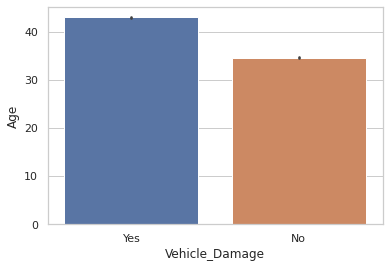

In [35]:
sns.barplot('Vehicle_Damage','Age',data=total_data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


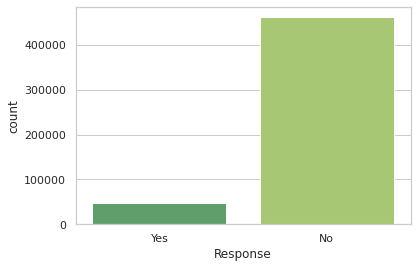

In [36]:
sns.countplot(total_data1['Response'],palette = 'summer')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


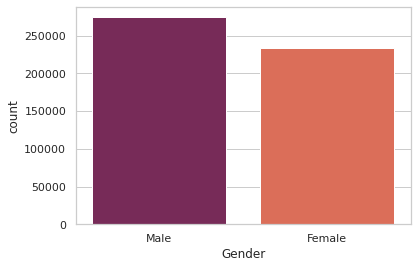

In [37]:
sns.countplot(total_data['Gender'], palette = 'rocket')

# Above we can see that male customers are more interested in insurence

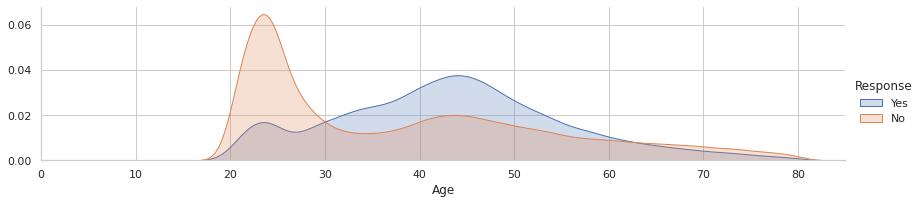

In [38]:
grid = sns.FacetGrid(total_data1,hue="Response",aspect = 4)
grid.map(sns.kdeplot,"Age",shade = True)
grid.set(xlim = (0, total_data1["Age"].max()))
grid.add_legend()

so, here we can visualize that customers having age below 30 are not interested in insurence. and the customers having age 30-60 are likely to be interested

In [39]:
DL = pd.crosstab(total_data1['Response'],total_data1['Driving_License'])

In [40]:
DL

Driving_License,No,Yes
Response,,
No,1008,460428
Yes,41,46669


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


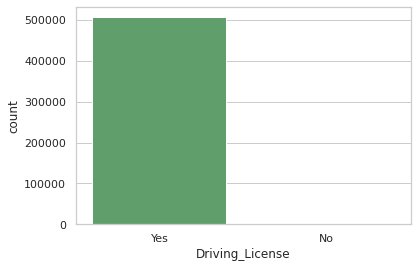

In [41]:
sns.countplot(total_data1['Driving_License'],palette = 'summer')

here we can see every customer have driving license except some.

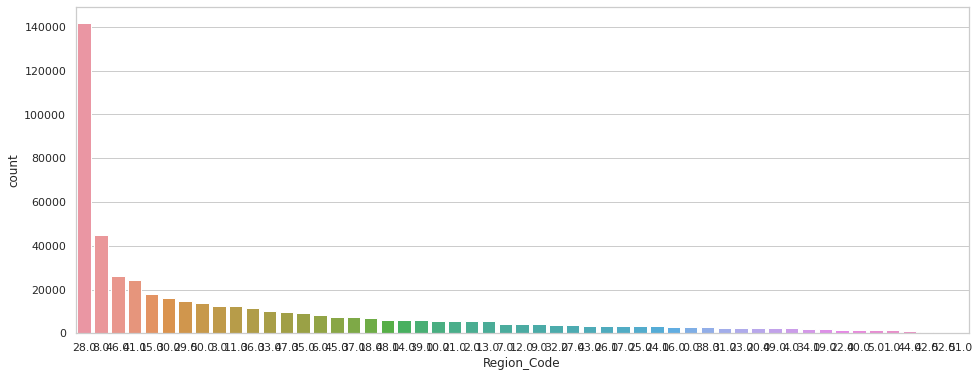

In [42]:
plt.figure(figsize=(16,6))
sns.countplot(x = "Region_Code", data = total_data, order = total_data['Region_Code'].value_counts().index)

Here we can see most of the data is collected from customers living in region with code 28

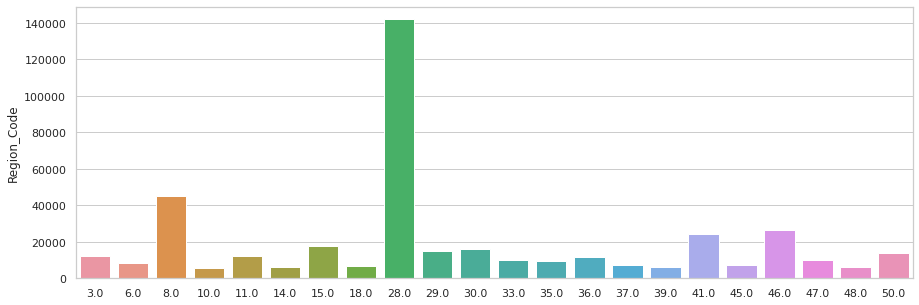

In [43]:
region = total_data['Region_Code'].value_counts()[:10].keys()
values = total_data['Region_Code'].value_counts()[:10]
plt.figure(figsize = (15,5))
sns.barplot(x=region, y=values)

In [44]:
temp3 = pd.DataFrame(total_data[total_data['Previously_Insured']==1].groupby('Gender')['Previously_Insured'].count())

In [45]:
temp3.head()

,Previously_Insured
Gender,
Female,117686
Male,115384


In [46]:
temp3['Insured']=temp3['Previously_Insured']
temp3.drop('Previously_Insured',axis=1,inplace=True)

In [47]:
temp4=pd.DataFrame(total_data[total_data['Previously_Insured']==0].groupby('Gender')['Previously_Insured'].count())

In [48]:
temp4['Not Insured']=temp4['Previously_Insured']
temp4.drop('Previously_Insured',axis=1,inplace=True)

In [49]:
prev_insured = temp3.merge(temp4,right_index=True,left_index=True)

In [50]:
prev_insured

,Insured,Not Insured
Gender,,
Female,117686,116135
Male,115384,158941


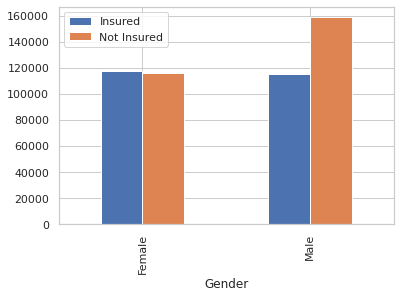

In [51]:
prev_insured.plot(kind="bar")

In previously insured, male customers was more likely interested in insurence

In [52]:
#Seperate data frame of gender and driving license
temp1 = pd.DataFrame(total_data[total_data['Driving_License']==1].groupby('Gender')['Driving_License'].count())

In [53]:
#seperate dataframe of gender who have driving license
temp1['have_license']=temp1['Driving_License']
temp1.drop('Driving_License',axis=1,inplace=True)

In [54]:
#seperate dataframe of gender who do not have driving license
temp2=pd.DataFrame(total_data[total_data['Driving_License']==0].groupby('Gender')['Driving_License'].count())

In [55]:
temp2['not_have_license']=temp2['Driving_License']
temp2.drop('Driving_License',axis=1,inplace=True)

In [56]:
#combine both dataframe of gender who have license and have not
licence_info=temp1.merge(temp2,right_index=True,left_index=True)

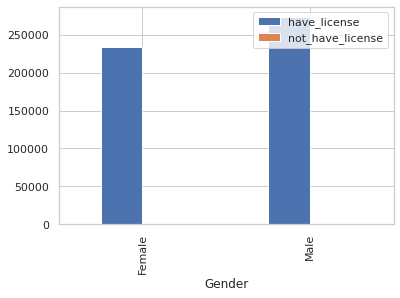

In [57]:
licence_info.plot(kind="bar")

In [58]:
# calculate the mean age of the customers
total_data['Age'].mean()

38.8084133300272

Here the average age of the customers is around 38-39

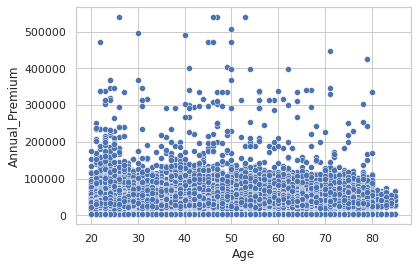

In [59]:
#scatter plot of age and annual premium
sns.scatterplot(x='Age',y='Annual_Premium',data = total_data)

In [60]:
# converting vehicle age colums values into numeric form of total_data
total_data['Vehicle_Age']=total_data['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})

In [61]:
total_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,2,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,2,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,0,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,0,No,27496.0,152.0,39,0


In [62]:
total_data.Vehicle_Age.unique()

array([2, 1, 0])

In [63]:
total_data.Gender.unique()

array(['Male', 'Female'], dtype=object)

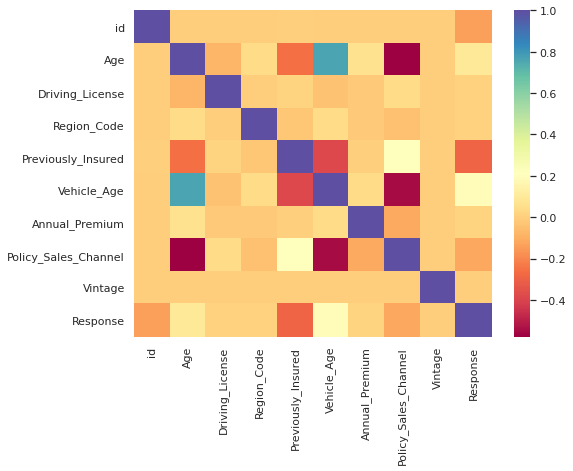

In [64]:
# corelation matrix
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(total_data.corr(), cmap = 'Spectral')

In [65]:
total_data.Region_Code.unique()

array([28.,  3., 11., 41., 33.,  6., 35., 50., 15., 45.,  8., 36., 30.,
       26., 16., 47., 48., 19., 39., 23., 37.,  5., 17.,  2.,  7., 29.,
       46., 27., 25., 13., 18., 20., 49., 22., 44.,  0.,  9., 31., 12.,
       34., 21., 10., 14., 38., 24., 40., 43., 32.,  4., 51., 42.,  1.,
       52.])

In [66]:
total_data["Region_Code"].value_counts()

28.0    141937
8.0      44900
46.0     26357
41.0     24400
15.0     17750
30.0     16276
29.0     14843
50.0     13657
3.0      12349
11.0     12328
36.0     11696
33.0     10307
47.0      9942
35.0      9309
6.0       8351
45.0      7543
37.0      7343
18.0      6903
48.0      6274
14.0      6249
39.0      6138
10.0      5847
21.0      5671
2.0       5398
13.0      5396
7.0       4313
12.0      4235
9.0       4084
32.0      3745
27.0      3711
43.0      3508
26.0      3461
17.0      3455
25.0      3352
24.0      3263
16.0      2727
0.0       2699
38.0      2677
31.0      2635
23.0      2596
20.0      2528
49.0      2388
4.0       2379
34.0      2190
19.0      2059
22.0      1729
40.0      1708
5.0       1698
1.0       1363
44.0      1064
42.0       787
52.0       357
51.0       271
Name: Region_Code, dtype: int64

In [67]:
total_data.Policy_Sales_Channel.unique()

array([ 26., 152., 160., 124.,  14.,  13.,  30., 156., 163., 157., 122.,
        19.,  22.,  15., 154.,  16.,  52., 155.,  11., 151., 125.,  25.,
        61.,   1.,  86.,  31., 150.,  23.,  60.,  21., 121.,   3., 139.,
        12.,  29.,  55.,   7.,  47., 127., 153.,  78., 158.,  89.,  32.,
         8.,  10., 120.,  65.,   4.,  42.,  83., 136.,  24.,  18.,  56.,
        48., 106.,  54.,  93., 116.,  91.,  45.,   9., 145., 147.,  44.,
       109.,  37., 140., 107., 128., 131., 114., 118., 159., 119., 105.,
       135.,  62., 138., 129.,  88.,  92., 111., 113.,  73.,  36.,  28.,
        35.,  59.,  53., 148., 133., 108.,  64.,  39.,  94., 132.,  46.,
        81., 103.,  90.,  51.,  27., 146.,  63.,  96.,  40.,  66., 100.,
        95., 123.,  98.,  75.,  69., 130., 134.,  49.,  97.,  38.,  17.,
       110.,  80.,  71., 117.,  58.,  20.,  76., 104.,  87.,  84., 137.,
       126.,  68.,  67., 101., 115.,  57.,  82.,  79., 112.,  99.,  70.,
         2.,  34.,  33.,  74., 102., 149.,  43.,   

In [68]:
total_data.Driving_License.unique()

array([1, 0])

In [69]:
total_data.Annual_Premium.unique()

array([40454., 33536., 38294., ..., 18997., 71396., 62875.])

In [70]:
total_data.Vintage.unique()

array([217, 183,  27, 203,  39, 176, 249,  72,  28,  80,  46, 289, 221,
        15,  58, 147, 256, 299, 158, 102, 116, 177, 232,  60, 180,  49,
        57, 223, 136, 222, 149, 169,  88, 253, 107, 264, 233,  45, 184,
       251, 153, 186,  71,  34,  83,  12, 246, 141, 216, 130, 282,  73,
       171, 283, 295, 165,  30, 218,  22,  36,  79,  81, 100,  63, 242,
       277,  61, 111, 167,  74, 235, 131, 243, 248, 114, 281,  62, 189,
       139, 138, 209, 254, 291,  68,  92,  52,  78, 156, 247, 275,  77,
       181, 229, 166,  16,  23,  31, 293, 219,  50, 155,  66, 260,  19,
       258, 117, 193, 204, 212, 144, 234, 206, 228, 125,  29,  18,  84,
       230,  54, 123, 101,  86,  13, 237,  85,  98,  67, 128,  95,  89,
        99, 208, 134, 135, 268, 284, 119, 226, 105, 142, 207, 272, 263,
        64,  40, 245, 163,  24, 265, 202, 259,  91, 106, 190, 162,  33,
       194, 287, 292,  69, 239, 132, 255, 152, 121, 150, 143, 198, 103,
       127, 285, 214, 151, 199,  56,  59, 215, 104, 238, 120,  2

# DATA TRANSFORMATION

In [71]:
# customers who are from channel 152 and have region code 28
b = np.logical_and(total_data.Policy_Sales_Channel==152, total_data.Region_Code==28.0)
np.count_nonzero(b)

18259

In [72]:
# customer who are from channel 152 and have region code 28 and are interested 
c = np.logical_and(total_data.Response == 1, b == True)
np.count_nonzero(c)

576

In [73]:
# customer who are from channel 152 and have region code 28 and are not interested 
d = np.logical_and(total_data.Response == 0, b == True)
np.count_nonzero(d)

17683

In [74]:
# customers who are not previously insured and they are interested
e = np.logical_and(total_data.Response == 1, total_data.Previously_Insured == 0)
np.count_nonzero(e)

46552

In [75]:
# customers who are previously insured and they are interested
f = np.logical_and(total_data.Response==1, total_data.Previously_Insured==1)
np.count_nonzero(f)

158

In [76]:
# customers who does not have driving liscence and they are interested
i = np.logical_and(total_data.Driving_License==0, total_data.Response==1)
np.count_nonzero(i)

41

In [77]:
# customers who have driving liscence and they are interested
i = np.logical_and(total_data.Driving_License==1, total_data.Response==1)
np.count_nonzero(i)

46669

In [78]:
# customers who's vehicle age is less than 1 year and they are interested
j = np.logical_and(total_data.Vehicle_Age==0, total_data.Response==1)
np.count_nonzero(j)

7202

In [79]:
# customers who's vehicle age is between 1 to 2 years and they are interested
k = np.logical_and(total_data.Vehicle_Age==1, total_data.Response==1)
np.count_nonzero(k)

34806

In [80]:
# customers who's vehicle age is greater than 2 years and they are interested
l = np.logical_and(total_data.Vehicle_Age==2, total_data.Response==1)
np.count_nonzero(l)

4702

In [200]:
total_data.Vehicle_Damage

0         Yes
1          No
2         Yes
3          No
4          No
         ... 
127032     No
127033    Yes
127034     No
127035     No
127036     No
Name: Vehicle_Damage, Length: 508146, dtype: object

In [201]:
# customers who does not have damaged vehicle and they are interested
m = np.logical_and(total_data.Vehicle_Damage=='No', total_data.Response==1)
np.count_nonzero(m)

982

In [202]:
# customers who does have damaged vehicle and they are interested
n = np.logical_and(total_data.Vehicle_Damage=='Yes', total_data.Response==1)
np.count_nonzero(n)

45728

In [82]:
len(total_data.Policy_Sales_Channel.unique())

157

In [83]:
# customers who have policy channel 26.0 and they are interested
o = np.logical_and(total_data.Policy_Sales_Channel==26.0, total_data.Response==1)
np.count_nonzero(o)

15891

In [84]:
# customers who have policy channel 160.0 and they are interested
o2 = np.logical_and(total_data.Policy_Sales_Channel==160.0, total_data.Response==1)
np.count_nonzero(o2)

475

In [85]:
# customers who have policy channel 124.0 and they are interested
o3 = np.logical_and(total_data.Policy_Sales_Channel==124.0, total_data.Response==1)
np.count_nonzero(o3)

13996

In [86]:
# customers who have policy channel 14.0 and they are interested
o4 = np.logical_and(total_data.Policy_Sales_Channel==14.0, total_data.Response==1)
np.count_nonzero(o4)

63

In [87]:
# customers who have policy channel 13.0 and they are interested
o5 = np.logical_and(total_data.Policy_Sales_Channel==13.0, total_data.Response==1)
np.count_nonzero(o5)

275

In [88]:
# customers who have policy channel 30.0 and they are interested
o6 = np.logical_and(total_data.Policy_Sales_Channel==30.0, total_data.Response==1)
np.count_nonzero(o6)

156

In [89]:
# customers who have policy channel 156.0, and they are interested
o7 = np.logical_and(total_data.Policy_Sales_Channel==156.0, total_data.Response==1)
np.count_nonzero(o7)

2297

In [90]:
# customers who have policy channel 163.0 and they are interested
o8=np.logical_and(total_data.Policy_Sales_Channel==163.0, total_data.Response==1)
np.count_nonzero(o8)

880

In [91]:
# customers who have policy channel 157.0 and they are interested
o9 = np.logical_and(total_data.Policy_Sales_Channel==157.0, total_data.Response==1)
np.count_nonzero(o9)

1794

In [92]:
# customers who have policy channel 122.0 and they are interested
o10 = np.logical_and(total_data.Policy_Sales_Channel==122.0, total_data.Response==1)
np.count_nonzero(o10)

1720

In [93]:
# customers who have policy channel 19.0 and they are interested
o11 = np.logical_and(total_data.Policy_Sales_Channel==19.0, total_data.Response==1)
np.count_nonzero(o11)

19

In [94]:
# customers who have policy channel 22.0 and they are interested
o12 = np.logical_and(total_data.Policy_Sales_Channel==22.0, total_data.Response==1)
np.count_nonzero(o12)

18

In [95]:
# customers who have policy channel 15.0 and they are interested
o13 = np.logical_and(total_data.Policy_Sales_Channel==15.0, total_data.Response==1)
np.count_nonzero(o13)

78

In [96]:
# customers who have policy channel 154.0 and they are interested
o14 = np.logical_and(total_data.Policy_Sales_Channel==154.0, total_data.Response==1)
np.count_nonzero(o14)

1474

In [97]:
# customers who have policy channel 16.0 and they are interested
o15 = np.logical_and(total_data.Policy_Sales_Channel==16.0, total_data.Response==1)
np.count_nonzero(o15)

45

In [98]:
# customers who have policy channel 52.0 and they are interested
o16 = np.logical_and(total_data.Policy_Sales_Channel==52.0, total_data.Response==1)
np.count_nonzero(o16)

115

In [99]:
# customers who have policy channel 155.0 and they are interested
o17 = np.logical_and(total_data.Policy_Sales_Channel==155.0, total_data.Response==1)
np.count_nonzero(o17)

395

In [100]:
# customers who have policy channel 11.0 and they are interested
o18 = np.logical_and(total_data.Policy_Sales_Channel==11.0, total_data.Response==1)
np.count_nonzero(o18)

108

In [101]:
# customers who have policy channel 151.0 and they are interested
o19 = np.logical_and(total_data.Policy_Sales_Channel==151.0, total_data.Response==1)
np.count_nonzero(o19)

122

In [102]:
# customers who have policy channel 125.0 and they are interested
o20 = np.logical_and(total_data.Policy_Sales_Channel==125.0, total_data.Response==1)
np.count_nonzero(o20)

127

In [103]:
# customers who have policy channel 25.0 and they are interested
o21 = np.logical_and(total_data.Policy_Sales_Channel==25.0, total_data.Response==1)
np.count_nonzero(o21)

369

In [104]:
# customers who have policy channel 61.0 and they are interested
o22 = np.logical_and(total_data.Policy_Sales_Channel==61.0, total_data.Response==1)
np.count_nonzero(o22)

56

In [105]:
# customers who have policy channel 1.0 and they are interested
o23=np.logical_and(total_data.Policy_Sales_Channel==1.0, total_data.Response==1)
np.count_nonzero(o23)

35

In [106]:
# customers who have policy channel 86.0 and they are interested
o24=np.logical_and(total_data.Policy_Sales_Channel==86.0, total_data.Response==1)
np.count_nonzero(o24)

6

In [107]:
# customers who have policy channel 31.0 and they are interested
o25=np.logical_and(total_data.Policy_Sales_Channel==31.0, total_data.Response==1)
np.count_nonzero(o25)

160

In [108]:
# customers who have policy channel 150.0 and they are interested
o26 = np.logical_and(total_data.Policy_Sales_Channel==150.0, total_data.Response==1)
np.count_nonzero(o26)

76

In [109]:
# customers who have policy channel 23.0 and they are interested
o27=np.logical_and(total_data.Policy_Sales_Channel==23.0, total_data.Response==1)
np.count_nonzero(o27)

58

In [110]:
# customers who have policy channel 60.0 and they are interested
o28=np.logical_and(total_data.Policy_Sales_Channel==60.0, total_data.Response==1)
np.count_nonzero(o28)

53

In [111]:
# customers who have policy channel 21.0 and they are interested
o29=np.logical_and(total_data.Policy_Sales_Channel==21.0, total_data.Response==1)
np.count_nonzero(o29)

12

In [112]:
# customers who have policy channel 121.0 and they are interested
o30=np.logical_and(total_data.Policy_Sales_Channel==121.0, total_data.Response==1)
np.count_nonzero(o30)

19

In [113]:
# customers who have policy channel 3.0 and they are interested
o31=np.logical_and(total_data.Policy_Sales_Channel==3.0, total_data.Response==1)
np.count_nonzero(o31)

159

In [114]:
# customers who have policy channel 12.0 and they are interested
o33=np.logical_and(total_data.Policy_Sales_Channel==12.0, total_data.Response==1)
np.count_nonzero(o33)

132

In [115]:
# customers who have policy channel 29.0 and they are interested
o34=np.logical_and(total_data.Policy_Sales_Channel==29.0, total_data.Response==1)
np.count_nonzero(o34)

106

In [116]:
# customers who have policy channel 55.0 and they are interested
o35=np.logical_and(total_data.Policy_Sales_Channel==55.0, total_data.Response==1)
np.count_nonzero(o35)

189

In [117]:
# customers who have policy channel 7.0 and they are interested
o36=np.logical_and(total_data.Policy_Sales_Channel==7.0, total_data.Response==1)
np.count_nonzero(o36)

182

In [118]:
# customers who have policy channel 47.0 and they are interested
o37=np.logical_and(total_data.Policy_Sales_Channel==47.0, total_data.Response==1)
np.count_nonzero(o37)

8

In [119]:
# customers who have policy channel 127.0 and they are interested
o38=np.logical_and(total_data.Policy_Sales_Channel==127.0, total_data.Response==1)
np.count_nonzero(o38)

8

In [120]:
# customers who have policy channel 153.0 and they are interested
o39=np.logical_and(total_data.Policy_Sales_Channel==153.0, total_data.Response==1)
np.count_nonzero(o39)

36

In [121]:
# customers who have policy channel 78.0 and they are interested
o40=np.logical_and(total_data.Policy_Sales_Channel==78.0, total_data.Response==1)
np.count_nonzero(o40)

3

In [122]:
# customers who have policy channel 158.0 and they are interested
o41=np.logical_and(total_data.Policy_Sales_Channel==158.0, total_data.Response==1)
np.count_nonzero(o41)

135

In [123]:
# customers who have policy channel 89.0 and they are interested
o42=np.logical_and(total_data.Policy_Sales_Channel==89.0, total_data.Response==1)
np.count_nonzero(o42)

2

In [124]:
# customers who have policy channel 32.0 and they are interested
o43=np.logical_and(total_data.Policy_Sales_Channel==32.0, total_data.Response==1)
np.count_nonzero(o43)

2

In [125]:
# customers who have policy channel 8.0 and they are interested
o44=np.logical_and(total_data.Policy_Sales_Channel==8.0, total_data.Response==1)
np.count_nonzero(o44)

125

In [126]:
# customers who have policy channel 10.0 and they are interested
o45=np.logical_and(total_data.Policy_Sales_Channel==10.0, total_data.Response==1)
np.count_nonzero(o45)

50

In [127]:
# customers who have policy channel 120.0 and they are interested
o46=np.logical_and(total_data.Policy_Sales_Channel==120.0, total_data.Response==1)
np.count_nonzero(o46)

65

In [128]:
# customers who have policy channel 65.0 and they are interested
o47=np.logical_and(total_data.Policy_Sales_Channel==65.0, total_data.Response==1)
np.count_nonzero(o47)

4

In [129]:
# customers who have policy channel 4.0 and they are interested
o48=np.logical_and(total_data.Policy_Sales_Channel==4.0, total_data.Response==1)
np.count_nonzero(o48)

102

In [130]:
# customers who have policy channel 42.0 and they are interested
o49=np.logical_and(total_data.Policy_Sales_Channel==42.0, total_data.Response==1)
np.count_nonzero(o49)

26

In [131]:
# customers who have policy channel 83.0 and they are interested
o50=np.logical_and(total_data.Policy_Sales_Channel==83.0, total_data.Response==1)
np.count_nonzero(o50)

0

In [132]:
# customers who have policy channel 136.0 and they are interested
o51=np.logical_and(total_data.Policy_Sales_Channel==136.0, total_data.Response==1)
np.count_nonzero(o51)

40

In [133]:
# customers who have policy channel 24.0 and they are interested
o52=np.logical_and(total_data.Policy_Sales_Channel==24.0, total_data.Response==1)
np.count_nonzero(o52)

99

In [134]:
# customers who have policy channel 18.0 and they are interested
o53=np.logical_and(total_data.Policy_Sales_Channel==18.0, total_data.Response==1)
np.count_nonzero(o53)

6

In [135]:
# customers who have policy channel 56.0 and they are interested
o54=np.logical_and(total_data.Policy_Sales_Channel==56.0, total_data.Response==1)
np.count_nonzero(o54)

12

In [136]:
# customers who have policy channel 48.0 and they are interested
o55=np.logical_and(total_data.Policy_Sales_Channel==48.0, total_data.Response==1)
np.count_nonzero(o55)

1

In [203]:
# customers who have Region_Code 28.0 and they are interested
p=np.logical_and(total_data.Region_Code==28.0, total_data.Response==1)
np.count_nonzero(p)

19917

In [137]:
# customers who have Region_Code 19.0 and they are interested
p17=np.logical_and(total_data.Region_Code==19.0, total_data.Response==1)
np.count_nonzero(p17)

250

In [138]:
# customers who have Region_Code 39.0 and they are interested
p18=np.logical_and(total_data.Region_Code==39.0, total_data.Response==1)
np.count_nonzero(p18)

574

In [139]:
# customers who have Region_Code 23.0 and they are interested
p19=np.logical_and(total_data.Region_Code==23.0, total_data.Response==1)
np.count_nonzero(p19)

300

In [140]:
# customers who have Region_Code 37.0 and they are interested
p20=np.logical_and(total_data.Region_Code==37.0, total_data.Response==1)
np.count_nonzero(p20)

436

In [141]:
# customers who have Region_Code 5.0 and they are interested
p21=np.logical_and(total_data.Region_Code==5.0, total_data.Response==1)
np.count_nonzero(p21)

148

In [142]:
# customers who have Region_Code 17.0 and they are interested
p22=np.logical_and(total_data.Region_Code==17.0, total_data.Response==1)
np.count_nonzero(p22)

184

In [143]:
# customers who have Region_Code 2.0 and they are interested
p23=np.logical_and(total_data.Region_Code==2.0, total_data.Response==1)
np.count_nonzero(p23)

287

In [144]:
# customers who have Region_Code 7.0 and they are interested
p24=np.logical_and(total_data.Region_Code==7.0, total_data.Response==1)
np.count_nonzero(p24)

432

In [145]:
# customers who have Region_Code 29.0 and they are interested
p25=np.logical_and(total_data.Region_Code==29.0, total_data.Response==1)
np.count_nonzero(p25)

1365

In [146]:
# customers who have Region_Code 46.0 and they are interested
p26=np.logical_and(total_data.Region_Code==46.0, total_data.Response==1)
np.count_nonzero(p26)

2032

In [147]:
# customers who have Region_Code 27.0 and they are interested
p27=np.logical_and(total_data.Region_Code==27.0, total_data.Response==1)
np.count_nonzero(p27)

209

In [148]:
# customers who have Region_Code 25.0 and they are interested
p28=np.logical_and(total_data.Region_Code==25.0, total_data.Response==1)
np.count_nonzero(p28)

107

In [149]:
# customers who have Region_Code 13.0 and they are interested
p29=np.logical_and(total_data.Region_Code==13.0, total_data.Response==1)
np.count_nonzero(p29)

364

In [150]:
# customers who have Region_Code 18.0 and they are interested
p30=np.logical_and(total_data.Region_Code==18.0, total_data.Response==1)
np.count_nonzero(p30)

678

In [151]:
# customers who have Region_Code 20.0 and they are interested
p31=np.logical_and(total_data.Region_Code==20.0, total_data.Response==1)
np.count_nonzero(p31)

223

In [152]:
# customers who have Region_Code 49.0 and they are interested
p32=np.logical_and(total_data.Region_Code==49.0, total_data.Response==1)
np.count_nonzero(p32)

137

In [153]:
# customers who have Region_Code 22.0 and they are interested
p33=np.logical_and(total_data.Region_Code==22.0, total_data.Response==1)
np.count_nonzero(p33)

83

In [154]:
# customers who have Region_Code 44.0 and they are interested
p34=np.logical_and(total_data.Region_Code==44.0, total_data.Response==1)
np.count_nonzero(p34)

33

In [155]:
# customers who have Region_Code 0.0 and they are interested
p35=np.logical_and(total_data.Region_Code==0.0, total_data.Response==1)
np.count_nonzero(p35)

174

In [156]:
# customers who have Region_Code 9.0 and they are interested
p36=np.logical_and(total_data.Region_Code==9.0, total_data.Response==1)
np.count_nonzero(p36)

253

In [157]:
# customers who have Region_Code 31.0 and they are interested
p37=np.logical_and(total_data.Region_Code==31.0, total_data.Response==1)
np.count_nonzero(p37)

197

In [158]:
# customers who have Region_Code 12.0 and they are interested
p38=np.logical_and(total_data.Region_Code==12.0, total_data.Response==1)
np.count_nonzero(p38)

312

In [159]:
# customers who have Region_Code 34.0 and they are interested
p39=np.logical_and(total_data.Region_Code==34.0, total_data.Response==1)
np.count_nonzero(p39)

126

In [160]:
# customers who have Region_Code 21.0 and they are interested
p40=np.logical_and(total_data.Region_Code==21.0, total_data.Response==1)
np.count_nonzero(p40)

303

In [161]:
# customers who have Region_Code 10.0 and they are interested
p41=np.logical_and(total_data.Region_Code==10.0, total_data.Response==1)
np.count_nonzero(p41)

263

In [162]:
# customers who have Region_Code 14.0 and they are interested
p42=np.logical_and(total_data.Region_Code==14.0, total_data.Response==1)
np.count_nonzero(p42)

422

In [163]:
# customers who have Region_Code 38.0 and they are interested
p43=np.logical_and(total_data.Region_Code==38.0, total_data.Response==1)
np.count_nonzero(p43)

389

In [164]:
# customers who have Region_Code 24.0 and they are interested
p44=np.logical_and(total_data.Region_Code==24.0, total_data.Response==1)
np.count_nonzero(p44)

342

In [165]:
# customers who have Region_Code 40.0 and they are interested
p45=np.logical_and(total_data.Region_Code==40.0, total_data.Response==1)
np.count_nonzero(p45)

153

In [166]:
# customers who have Region_Code 43.0 and they are interested
p46=np.logical_and(total_data.Region_Code==43.0, total_data.Response==1)
np.count_nonzero(p46)

244

In [167]:
# customers who have Region_Code 32.0 and they are interested
p47=np.logical_and(total_data.Region_Code==32.0, total_data.Response==1)
np.count_nonzero(p47)

239

In [168]:
# customers who have Region_Code 4.0 and they are interested
p48=np.logical_and(total_data.Region_Code==4.0, total_data.Response==1)
np.count_nonzero(p48)

285

In [169]:
# customers who have Region_Code 51.0 and they are interested
p49=np.logical_and(total_data.Region_Code==51.0, total_data.Response==1)
np.count_nonzero(p49)

28

In [170]:
# customers who have Region_Code 42.0 and they are interested
p50=np.logical_and(total_data.Region_Code==42.0, total_data.Response==1)
np.count_nonzero(p50)

44

In [171]:
 # customers who have Region_Code 1.0 and they are interested
p51=np.logical_and(total_data.Region_Code==1.0, total_data.Response==1)
np.count_nonzero(p51)

109

In [172]:
# customers who have Region_Code 52.0 and they are interested
p52=np.logical_and(total_data.Region_Code==52.0, total_data.Response==1)
np.count_nonzero(p52)

33

In [173]:
len(total_data.Vintage.unique())

290

In [205]:
total_data.Vintage.max()

299

In [204]:
# customers who are associated with the company the longest days and are interested 
q=np.logical_and(total_data.Vintage==total_data.Vintage.max(), total_data.Response==1)
np.count_nonzero(q)

169

In [206]:
# customers who are associated with the company the longest days and are interested 
qb=np.logical_and(total_data.Vintage==total_data.Vintage.max(), total_data.Response==0)
np.count_nonzero(qb)

1540

In [175]:
# customers who are associated with the company the least days and they are interested
q1=np.logical_and(total_data.Vintage==train.Vintage.min(), total_data.Response==1)
np.count_nonzero(q1)

147

In [176]:
len(total_data.Annual_Premium.unique())

52062

In [210]:
 # customers who are paying the maximum amount and they are interested
rb=np.logical_and(total_data.Annual_Premium==total_data.Annual_Premium.max(), total_data.Response==0)
np.count_nonzero(rb)

3

In [207]:
 # customers who are paying the maximum amount and they are interested
r1=np.logical_and(total_data.Annual_Premium==total_data.Annual_Premium.max(), total_data.Response==1)
np.count_nonzero(r1)

1

In [178]:
r1.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [208]:
# customers who are paying the minimum amount and they are interested
r2=np.logical_and(total_data.Annual_Premium==total_data.Annual_Premium.min(), total_data.Response==1)
np.count_nonzero(r2)

8505

In [180]:
len(total_data.Age.unique())

66

In [181]:
# maximum age
total_data.Age.max()

85

In [182]:
# minimum age
total_data.Age.min()

20

In [185]:
total_data['Age']=total_data['Age'].replace({20:'20-30',21:'20-30',22:'20-30',23:'20-30',
                                    
24:'20-30',25:'20-30',26:'20-30',27:'20-30',28:'20-30',29:'20-30',30:'20-30',

31:'31-41',32:'31-41',33:'31-41',34:'31-41',35:'31-41',36:'31-41',
 
37:'31-41',38:'31-41',39:'31-41',40:'31-41',
 
41:'31-41',42:'42-52',43:'42-52',44:'42-52',
 
45:'42-52',46:'42-52',47:'42-52',48:'42-52',
 
49:'42-52',50:'42-52',51:'42-52',52:'42-52',
 
53:'53-63',54:'53-63',55:'53-63',56:'53-63',
 
57:'53-63',58:'53-63',59:'53-63',60:'53-63',
 
61:'53-63',62:'53-63',63:'53-63',64:'64-74',
 
65:'64-74',66:'64-74',67:'64-74',68:'64-74',
 
69:'64-74',70:'64-74',71:'64-74',72:'64-74',
 
73:'64-74',74:'64-74',75:'75-85',76:'75-85',77:'75-85',
 
78:'75-85',79:'75-85',80:'75-85',81:'75-85',
 
82:'75-85',83:'75-85',84:'75-85',85:'75-85'})

In [186]:
total_data.Age.max()

'75-85'

In [187]:
total_data.Age.min()

'20-30'

In [188]:
# customers who have age group '42-52' and are interested 
s=np.logical_and(total_data.Age=='42-52', total_data.Response==1)
np.count_nonzero(s)

16569

In [189]:
# customers who have age group '75-85' and are interested 
s1=np.logical_and(total_data.Age=='75-85', total_data.Response==1)
np.count_nonzero(s1)

503

In [190]:
# customers who have age group '20-30' and are interested 
s2=np.logical_and(total_data.Age=='20-30', total_data.Response==1)
np.count_nonzero(s2)

7183

In [191]:
# customers who have age group '53-63' and are interested 
s3=np.logical_and(total_data.Age=='53-63', total_data.Response==1)
np.count_nonzero(s3)

6758

In [192]:
# customers who have age group '31-41' and are interested 
s4=np.logical_and(total_data.Age=='31-41', total_data.Response==1)
np.count_nonzero(s4)

13212

In [193]:
# customers who have age group '64-74' and are interested 
s5=np.logical_and(total_data.Age=='64-74', total_data.Response==1)
np.count_nonzero(s5)

2485

In [194]:
g1 = pd.DataFrame(s5)

In [195]:
g1

,0
0,False
1,False
2,False
3,False
4,False
...,...
127032,False
127033,False
127034,False
127035,False


In [196]:
len(total_data.Vintage.unique())

290

In [197]:
# maximum number of days
total_data.Vintage.max()

299

In [198]:
# minimum number of days
total_data.Vintage.min()

10